<a href="https://colab.research.google.com/github/DoHyung08/RL/blob/main/0406myEnv/seaRescue_SOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##start

In [ ]:
!pip install gymnasium[classic-control]

import gymnasium as gym
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#랜덤한 확률로 true 반환하는 함수.
#주어진 확률로 행동을 선택하는 과정 간결화
#0.00%까지만 반영, 그외 버림
#매개변수는 0.00% 형식

def randomTrue(a):
  a = round(a * 100)
  tar = random.randint(0,10000)

  if(tar < a):
    return True
  else:
    return False

#환경 -> 한컴타자 해상구조 sos


매 단계마다
상대는 70% 확률로 튜브를 얻음
플레이어와 상대 모두 무조건 튜브 1개씩을 잃음

초기상태 : 각자 튜브 7개


##상태[player, opposite]

플레이어와 상대방의 튜브 개수
각자 0이 되면 진다.
동시에 0이되면 비긴다.


##행동[0,1]

상대의 튜브 없애기로 결정
-> 70% 확률로 없어짐

튜브를 먹기로 결정
-> 70% 확률로 먹음


##보상
지면 -1
이기면 1
진행중이거나 비기면 0


#기본 환경 구현 & 실행

In [ ]:
class sos:
    def __init__(self):
        self.action_space = [0,1]

    def transition(self, state, action):

        if action == 0:#상대 튜브 없애기
          if randomTrue(70):
            state[1] = state[1] - 1
        else:#자기 튜브 쌓기
          if(randomTrue(70)):
            state[0] = state[0] + 1

        state[0] -=1#
        state[1] -=1# 매 단계마다 튜브 하나씩 잃음
        if randomTrue(70):#상대방이 0.7의 확률로 튜브 얻음
          state[1] +=1

        self.state = state
        return state


    def reward_function(self, state, action):#보상함수
        reward = 0
        if state[0]<=0 and state[1] > 0:
          reward = -1
        elif state[0] > 0 and state[1] <= 0:
          reward = 1

        return reward


    def reset(self):
        self.state = [7,7]#각자 7개씩 튜브를 가진 상태에서 시작
        self.reward = 0
        return self.state


    def step(self, action):

        next_state = self.transition(self.state, action)
        reward = self.reward_function(self.state, action)
        done = (self.state[0] <= 0 or self.state[1] <= 0)

        return next_state, reward, done

Initial state: [7, 7]


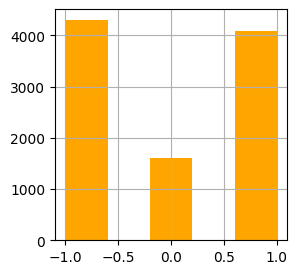

In [ ]:
env = sos()#환경 실행
state = env.reset()
done = False
print("Initial state:", state)

rewards = list()

for i in range(0, 10000):
  env.reset()
  done = False
  while not done:
      action = np.random.choice(env.action_space)
      #print("\nChose action:", action)
      state, reward, done = env.step(action)
      #print("New state:", state)
      if(done):
        #print("Reward:", reward)
        rewards.append(reward)

plt.figure(figsize=(3,3))
plt.hist(rewards,color='orange',bins=5)
plt.grid(True)

plt.show()


10000번 반복. 위 환경과 랜덤한 행동선택에서 플레이어와 상대방의 승률이 거의 같은 것으로 나타났다.

#환경 변경

------------------>>>>>

#확률을 가진 튜브


행동공간은 [-1,0,1,2,3] 이다.
-1은 상대의 튜브를 없애는 것,
0,1,2,3은 각각 0번째, 1번째, 2번째, 3번째 튜브를 선택하여 얻는 것이다.

상대방이 튜브를 얻을 때도 4개중 하나를 랜덤하게 선택한다

튜브를 없을 때와 얻을 때 모두 행동이 성공할 확률은 튜브에 적힌 1~99 사이 숫자이다.
이것은 실제 한컴 타자 연습에서 튜브에 적힌 글자가 치기 어려운 정도를 의미한다.
추후 이 확률에 따른 행동 선택으로 승률이 어떻게 변하는지, 에이전트가 어떻게 학습하는지 관찰할 수 있다.




In [ ]:
class tubesos:
    def __init__(self):
        self.action_space = [-1,0,1,2,3]

    def transition(self, state, action):

        if action == -1:#상대 튜브 없애기
          if randomTrue(self.otherTube):
            self.otherTube = random.choice(list(range(1,100)))
            state[1] = state[1] - 1
        else:#자기 튜브 쌓기
          if(randomTrue(self.tubes[action])):
            self.tubes[action] = random.choice(list(range(1,100)))
            state[0] = state[0] + 1

        state[0] -=1#
        state[1] -=1# 매 단계마다 튜브 하나씩 잃음

        cho = random.choice([0,1,2,3])


        if randomTrue(self.tubes[cho]):#상대방이 0.7의 확률로 튜브 얻음
          self.tubes[cho] = random.choice(list(range(1,100)))
          state[1] +=1

        self.state = state
        return state


    def reward_function(self, state, action):
        reward = 0
        if state[0]<=0 and state[1] > 0:
          reward = -1
        elif state[0] > 0 and state[1] <= 0:
          reward = 1

        return reward


    def reset(self):
        self.state = [7,7]
        self.tubes = [random.choice(list(range(1,100))) for i in range(4)]
        self.otherTube = random.choice(list(range(1,100)))
        self.reward = 0
        return self.state


    def step(self, action):

        next_state = self.transition(self.state, action)
        reward = self.reward_function(self.state, action)
        done = (self.state[0] <= 0 or self.state[1] <= 0)

        return next_state, reward, done

#확률을 가진 튜브 - 실행

근소한 차이지만 플레이어의 승률이 더 높다.

Initial state: [7, 7]


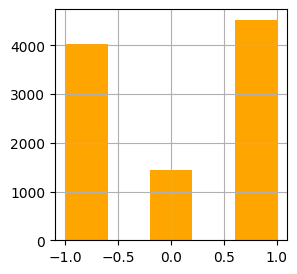

In [ ]:
env = tubesos()
state = env.reset()
done = False
print("Initial state:", state)

rewards = list()

for i in range(0, 10000):
  env.reset()
  done = False
  while not done:
      action = np.random.choice(env.action_space)
      #print("\nChose action:", action)
      state, reward, done = env.step(action)
      #print("New state:", state)
      if(done):
        #print("Reward:", reward)
        rewards.append(reward)

plt.figure(figsize=(3,3))
plt.hist(rewards,color='orange',bins=5)
plt.grid(True)

plt.show()


#영리한 상대방
상대방이 자신이 얻은 튜브를 고를 때, 성공 확률이 가장 높은 튜브,
즉 가장 쉬운 단어가 적힌 튜브를 고른다.

In [ ]:
class smartOPsos:
    def __init__(self):
        self.action_space = [-1,0,1,2,3]

    def transition(self, state, action):

        if action == -1:#상대 튜브 없애기
          if randomTrue(self.otherTube):
            self.otherTube = random.choice(list(range(1,100)))
            state[1] = state[1] - 1
        else:#자기 튜브 쌓기
          if(randomTrue(self.tubes[action])):
            self.tubes[action] = random.choice(list(range(1,100)))
            state[0] = state[0] + 1

        state[0] -=1#
        state[1] -=1# 매 단계마다 튜브 하나씩 잃음

        cho = self.tubes.index(max(self.tubes))


        if randomTrue(self.tubes[cho]):#상대방이 0.7의 확률로 튜브 얻음
          self.tubes[cho] = random.choice(list(range(1,100)))
          state[1] +=1

        self.state = state
        return state


    def reward_function(self, state, action):
        reward = 0
        if state[0]<=0 and state[1] > 0:
          reward = -1
        elif state[0] > 0 and state[1] <= 0:
          reward = 1

        return reward


    def reset(self):
        self.state = [7,7]
        self.tubes = [random.choice(list(range(1,100))) for i in range(4)]
        self.otherTube = random.choice(list(range(1,100)))
        self.reward = 0
        return self.state


    def step(self, action):

        next_state = self.transition(self.state, action)
        reward = self.reward_function(self.state, action)
        done = (self.state[0] <= 0 or self.state[1] <= 0)

        return next_state, reward, done

#실행 - 영리한 상대방
눈에 띄게 승률이 차이난다.
상대방의 승률이 플레이어보다 8배가량 높다

Initial state: [7, 7]


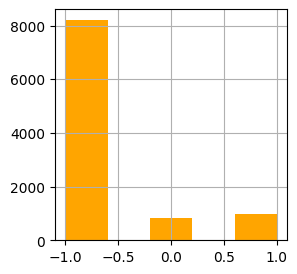

In [ ]:
env = smartOPsos()
state = env.reset()
done = False
print("Initial state:", state)

rewards = list()

for i in range(0, 10000):
  env.reset()
  done = False
  while not done:
      action = np.random.choice(env.action_space)
      #print("\nChose action:", action)
      state, reward, done = env.step(action)
      #print("New state:", state)
      if(done):
        #print("Reward:", reward)
        rewards.append(reward)

plt.figure(figsize=(3,3))
plt.hist(rewards,color='orange',bins=5)
plt.grid(True)

plt.show()


#추가할 것
플레이어가 가장 성공확률이 낮은 튜브를 고르는 알고리즘 추가하기

튜브 먹지 말고 상대꺼 뺏는게 더 좋을수도?